In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2

In [2]:
path1 = r"D:\CNN\Shoe Classification\train" #Giving path of Dogs_Cats folder
cate = ['Boots', 'Sandals','Slippers'] #name of sub_folders

In [3]:
for i in cate:
    folders = os.path.join(path1, i)
    print(folders)

D:\CNN\Shoe Classification\train\Boots
D:\CNN\Shoe Classification\train\Sandals
D:\CNN\Shoe Classification\train\Slippers


In [4]:
for i in cate:
    folders = os.path.join(path1, i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        print(image_path)

D:\CNN\Shoe Classification\train\Boots\boots (1).jpg
D:\CNN\Shoe Classification\train\Boots\boots (10).jpg
D:\CNN\Shoe Classification\train\Boots\boots (100).jpg
D:\CNN\Shoe Classification\train\Boots\boots (101).jpg
D:\CNN\Shoe Classification\train\Boots\boots (102).jpg
D:\CNN\Shoe Classification\train\Boots\boots (103).jpg
D:\CNN\Shoe Classification\train\Boots\boots (104).jpg
D:\CNN\Shoe Classification\train\Boots\boots (105).jpg
D:\CNN\Shoe Classification\train\Boots\boots (106).jpg
D:\CNN\Shoe Classification\train\Boots\boots (107).jpg
D:\CNN\Shoe Classification\train\Boots\boots (108).jpg
D:\CNN\Shoe Classification\train\Boots\boots (109).jpg
D:\CNN\Shoe Classification\train\Boots\boots (11).jpg
D:\CNN\Shoe Classification\train\Boots\boots (110).jpg
D:\CNN\Shoe Classification\train\Boots\boots (111).jpg
D:\CNN\Shoe Classification\train\Boots\boots (112).jpg
D:\CNN\Shoe Classification\train\Boots\boots (113).jpg
D:\CNN\Shoe Classification\train\Boots\boots (114).jpg
D:\CNN\Shoe Cl

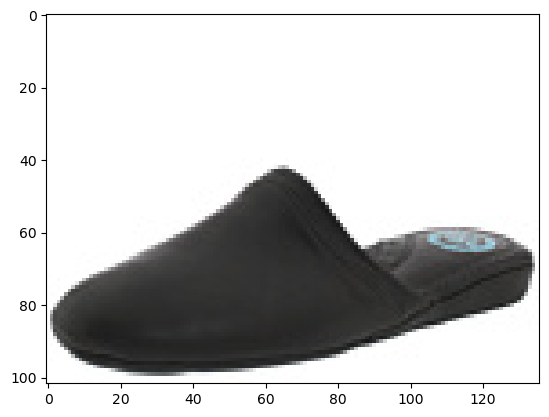

In [5]:
for i in cate:
    folders = os.path.join(path1, i)
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path)
        plt.imshow(image_array)
        break

In [6]:
image_size = 200 #hyperparameter
path1 = r"D:\CNN\Shoe Classification\train"
cate = ['Boots', 'Sandals','Slippers']

input_image = [] #empty_list #contains both the categories
for i in cate:
    folders = os.path.join(path1, i)
    label = cate.index(i) 
    for image in os.listdir(folders):
        image_path = os.path.join(folders, image)
        image_array = cv2.imread(image_path) #read the image file
        #resize the image into square format image_size x image_size pixels
        image_array = cv2.resize(image_array, (image_size, image_size))
        input_image.append([image_array, label]) # Appends a list containing the image array
#         print(image_path)

In [7]:
input_image[9]

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [8]:
np.random.shuffle(input_image)

In [9]:
X = []
Y = []
for X_values, labels in input_image:
    X.append(X_values)
    Y.append(labels)

In [10]:
len(X)

778

In [11]:
len(Y)

778

In [12]:
X = np.array(X) / 255.0
Y = np.array(Y)

In [13]:
type(input_image)

list

In [14]:
input_image = np.array(input_image)

C:\Users\Priya\AppData\Local\Temp\ipykernel_10896\1412455150.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  input_image = np.array(input_image)


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
type(X)

numpy.ndarray

In [17]:
# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [18]:
print(f"Training data: {X_train.shape}, {y_train.shape}")
print(f"Validation data: {X_test.shape}, {y_test.shape}")

Training data: (622, 200, 200, 3), (622,)
Validation data: (156, 200, 200, 3), (156,)


In [21]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, AvgPool2D
from tensorflow.keras.utils import to_categorical

In [22]:
import tensorflow as tf
import keras

In [23]:
model = Sequential()
model.add(Conv2D(filters = 64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu', input_shape = X.shape[1:]))
model.add(Dense(128, activation = 'relu', input_shape = X.shape[1:])) #hidden layer
model.add(Dense(3, activation ='softmax'))

C:\Users\Priya\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [25]:
model.fit(X_train, y_train, epochs = 10, batch_size = 200, validation_split= .1)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.3818 - loss: 34.7106 - val_accuracy: 0.1270 - val_loss: 24.4196
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2789 - loss: 16.9921 - val_accuracy: 0.3492 - val_loss: 8.6799
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4641 - loss: 6.0325 - val_accuracy: 0.6032 - val_loss: 0.8284
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.4778 - loss: 0.9777 - val_accuracy: 0.7619 - val_loss: 0.5881
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.7393 - loss: 0.8231 - val_accuracy: 0.7778 - val_loss: 0.5509
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8473 - loss: 0.4334 - val_accuracy: 0.8254 - val_loss: 0.4117
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.8460 - loss: 0.3295 - val_accuracy: 0.8730 - val_loss: 0.3648
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9183 - loss: 0.2749 - val_accuracy: 0.8889 - val_loss: 0.3067
Epoch 9/10
3

In [26]:
test_path = r"D:\CNN\Shoe Classification\test"

In [27]:
# List to store the test images
test_images = []

In [28]:
# Read and preprocess the test images
for image_name in os.listdir(test_path):
    image_path = os.path.join(test_path, image_name)
    image_array = cv2.imread(image_path)
    image_array = cv2.resize(image_array, (200, 200))  # Resize to match training image size
    test_images.append(image_array)

In [29]:
# Convert list to NumPy array and normalize
test_images = np.array(test_images)
test_images = test_images / 255.0  # Normalization

In [30]:
# Predict using the trained model
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


In [31]:
# Convert probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
tab = confusion_matrix(y_test, predicted_labels)
tab

array([[62,  2,  0],
       [ 2, 54,  3],
       [ 0,  7, 26]], dtype=int64)

In [34]:
print(f"Number of images: {len(X)}")
print(f"Number of labels: {len(Y)}")

Number of images: 778
Number of labels: 778


In [35]:
print(classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        64
           1       0.86      0.92      0.89        59
           2       0.90      0.79      0.84        33

    accuracy                           0.91       156
   macro avg       0.91      0.89      0.90       156
weighted avg       0.91      0.91      0.91       156



### From the above classification report

### --Class 0 (Boots): Precision: 0.98<br>
#### Recall: 0.97<br>
#### F1-Score: 0.97<br>
#### Support: 64<br>

### --Class 1 (Sandals):<br>

#### Precision: 0.86<br>
#### Recall: 0.92<br>
#### F1-Score: 0.89<br>
#### Support: 59<br>

### --Class 2 (Slippers):<br>

#### Precision: 0.90<br>
#### Recall: 0.79<br>
#### F1-Score: 0.84<br>
#### Support: 33